In [2]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-5);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);

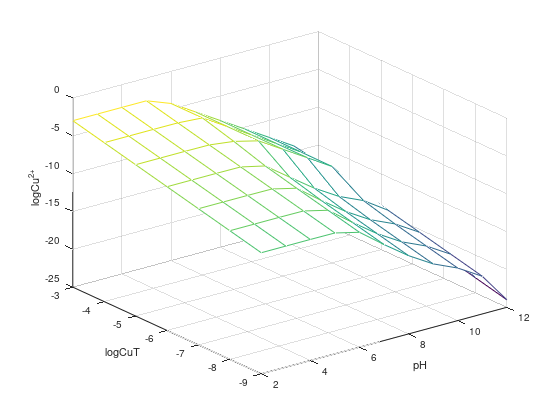

In [8]:
% MODEL FOR COMPARISON
graphics_toolkit("notebook")
%graphics_toolkit("plotly")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

logCuT=-9:1:-3; ENT=1e-5; PCO2=10^-3.5;
pHv=2:1:12;

for i=1:length(logCuT)
    for j=1:length(pHv)
        CuT=10^logCuT(i); inorganicTOTALS=[CuT ENT];
        inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
        TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
        pH=pHv(j); pe=20.75-pH; 
        [Cu2plus(i,j),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR(i,j)]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
    end
end

mesh(pHv,logCuT,log10(Cu2plus))
xlabel('pH'); ylabel('logCuT'); zlabel('logCu^{2+}')
